<a href="https://colab.research.google.com/github/park-cheonho/titanic/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA 10개의 데이터로 1개 Survived인지 아닌지 파악하는 것이 목표!! 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files

In [5]:
files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [8]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


In [0]:
train = pd.read_csv("train.csv",index_col='PassengerId')

In [10]:
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
round(train['Survived'].mean() * 100,4)

38.3838

In [12]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
pd.pivot_table(data=train, index='Sex', values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
pd.pivot_table(data=train, index=['Sex','Pclass'], values='Survived')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

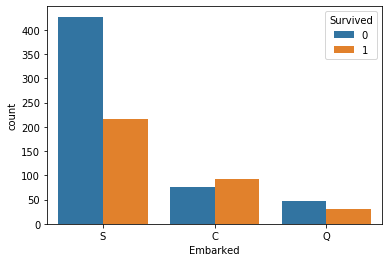

In [15]:
sns.countplot(data=train, x='Embarked',hue="Survived") #Pclass 와 Sex는 생존에 영향

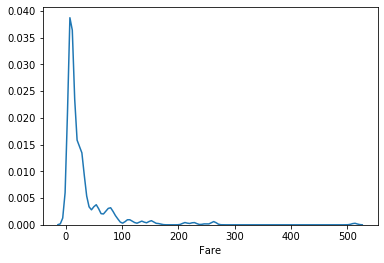

In [16]:
sns.distplot(train['Fare'], hist=False)

In [17]:
low_fare = train[train['Fare']<100]
print(low_fare.shape)
low_fare.head()

(838, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


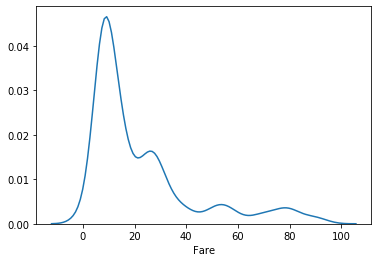

In [18]:
sns.distplot(low_fare['Fare'], hist=False)

In [19]:
survived = train[train['Survived']==1]
print(survived.shape)
survived.head()

(342, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


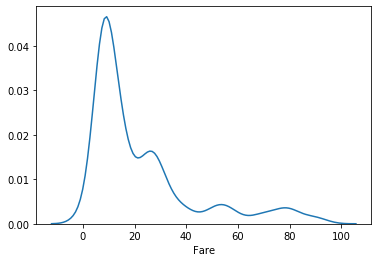

In [20]:
sns.distplot(low_fare['Fare'], survived['Survived'],hist=False)

In [21]:
dead = low_fare[low_fare['Survived'] == 0]
print(dead.shape)
dead.head()

(535, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [22]:
survived = low_fare[low_fare['Survived'] == 1]
print(survived.shape)
survived.head()

(303, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


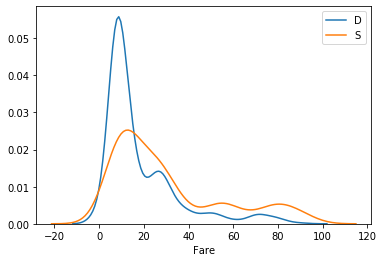

In [23]:
sns.distplot(dead['Fare'], hist=False, label='D')
sns.distplot(survived['Fare'], hist=False, label='S')

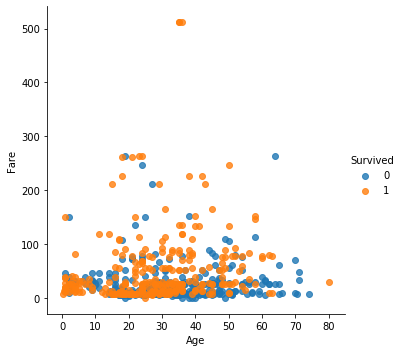

In [24]:
sns.lmplot(data=train, x='Age', y="Fare", hue='Survived', fit_reg=False)

In [0]:
train['Family'] = train['SibSp'] + train['Parch']

In [26]:
pd.pivot_table(data=train, index='Family', values='Survived')

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


#Prediction

In [0]:
import numpy as np
import pandas as pd

In [28]:
files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [31]:
train = pd.read_csv("train.csv", index_col='PassengerId')
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test = pd.read_csv("test.csv", index_col='PassengerId')
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train.loc[train['Sex'] == 'male', 'Sex_revised'] = 0
train.loc[train['Sex'] == 'female', 'Sex_revised'] = 1

In [34]:
train[['Sex','Sex_revised']].head()

,Sex,Sex_revised
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [0]:
test.loc[test['Sex'] == 'male', 'Sex_revised'] = 0
test.loc[test['Sex'] == 'female', 'Sex_revised'] = 1

In [36]:
test[['Sex','Sex_revised']].head()

,Sex,Sex_revised
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [0]:
train['C'] = train['Embarked'] == 'C' #C,S,Q가 숫자로 바꾸기 컴퓨터가 인식에 뭔가 문제 클래스가 3개이상이면 클래스에 맞춰서 행렬만들어주기 아니면 트루펄스로
train['S'] = train['Embarked'] == 'S' #원핫인코딩?이라는거같음
train['Q'] = train['Embarked'] == 'Q'

In [39]:
train[['Embarked','C', 'S', 'Q']].head(10)

,Embarked,C,S,Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
6,Q,False,False,True
7,S,False,True,False
8,S,False,True,False
9,S,False,True,False


In [0]:
test['C'] = test['Embarked'] == 'C' #C,S,Q가 숫자로 바꾸기 컴퓨터가 인식에 뭔가 문제 클래스가 3개이상이면 클래스에 맞춰서 행렬만들어주기 아니면 트루펄스로
test['S'] = test['Embarked'] == 'S' #원핫인코딩?이라는거같음
test['Q'] = test['Embarked'] == 'Q'

In [41]:
test[['Embarked','C', 'S', 'Q']].head(10)

,Embarked,C,S,Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
897,S,False,True,False
898,Q,False,False,True
899,S,False,True,False
900,C,True,False,False


In [0]:
train.loc[train['Age'].isnull(),'Age'] = train['Age'].mean()

In [43]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_revised,C,S,Q
PassengerId,,,,,,,,,,,,,,,


In [0]:
test.loc[test['Age'].isnull(),'Age'] = train['Age'].mean()

In [0]:
train['Young'] = train['Age'] < 14
test['Young'] = test['Age'] < 14

In [0]:
train['Mid'] = (train['Age'] >=20) & (train['Age'] < 50)
test['Mid'] = (test['Age'] >= 20 ) & (test['Age'] < 50)

In [0]:
train['Old'] = train['Age'] >= 50
test['Old'] = test['Age'] >= 50

In [0]:
train['Low_fare'] = train['Fare'] < 14
test['Low_fare'] = test['Fare'] < 14

In [0]:
train['Mid_fare'] = (train['Fare'] >=14) & (train['Fare'] < 40)
test['Mid_fare'] = (test['Fare'] >=14) & (test['Fare'] < 40)

In [0]:
train['High_fare'] = train['Fare'] >= 40
test['High_fare'] = test['Fare'] >= 40

In [0]:
feature_names = ['Sex_revised','Pclass','C','S','Q','Young', 'Mid', 'Old', 'Low_fare', 'Mid_fare', 'High_fare']

In [53]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 11)


,Sex_revised,Pclass,C,S,Q,Young,Mid,Old,Low_fare,Mid_fare,High_fare
PassengerId,,,,,,,,,,,
1,0.0,3,False,True,False,False,True,False,True,False,False
2,1.0,1,True,False,False,False,True,False,False,False,True
3,1.0,3,False,True,False,False,True,False,True,False,False
4,1.0,1,False,True,False,False,True,False,False,False,True
5,0.0,3,False,True,False,False,True,False,True,False,False


In [54]:
y_train = train['Survived']
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 11)


,Sex_revised,Pclass,C,S,Q,Young,Mid,Old,Low_fare,Mid_fare,High_fare
PassengerId,,,,,,,,,,,
892,0.0,3,False,False,True,False,True,False,True,False,False
893,1.0,3,False,True,False,False,True,False,True,False,False
894,0.0,2,False,False,True,False,False,True,True,False,False
895,0.0,3,False,True,False,False,True,False,True,False,False
896,1.0,3,False,True,False,False,True,False,True,False,False


In [58]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
import graphviz
from sklearn.tree import export_graphviz

In [0]:
export_graphviz(model, feature_names = feature_names, class_names=['Dead','Survived'], out_file='tree.dot')

In [61]:
!ls

'gender_submission (1).csv'   sample_data     test.csv	       train.csv
 gender_submission.csv	     'test (1).csv'  'train (1).csv'   tree.dot


In [0]:
with open('tree.dot') as f:
  graph = f.read()

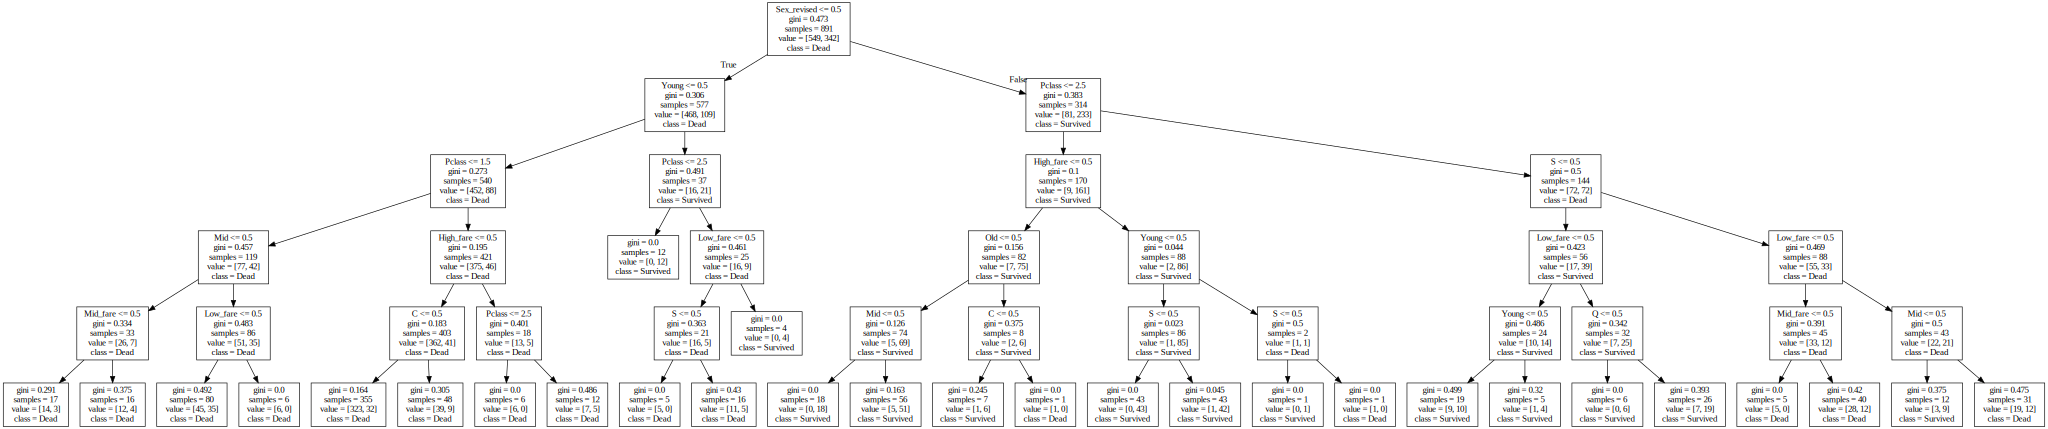

In [0]:
graphviz.Source(graph)

In [64]:
files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [65]:
submit = pd.read_csv('gender_submission.csv', index_col='PassengerId')
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [0]:
submit['Survived'] = model.predict(X_test)

In [0]:
submit.to_csv("submit.csv")

In [0]:
files.download("submit.csv")

In [69]:
train['Name'][1].split(",")[1].split(".")[0]

' Mr'

In [0]:
def title(name):
  return name.split(",")[1].split(".")[0]


In [0]:
train['Title'] = train['Name'].apply(title)

In [0]:
train[['Name','Title']].head()

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
